<a href="https://colab.research.google.com/github/vedang-lab/my-first-project/blob/main/lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Searching
Implement Linear Search. Determine the time required to search for element. Repeat the experiment for different values of n, the number of elements in the list to besearched and plot a graph of the time taken versus n.

- To implement Linear Search, measure its time complexity for searching an element, vary the input size by changing the number of elements in the list, and plot a graph to visualize the relationship between time taken and input size
- Algorithm:  
1. Start with the first element of the list.
2. Compare the element with the value being searched for.
3. If the element matches, return the index.
4. If the element does not match, move to the next element and repeat steps 2-3.
5. If the end of the list is reached and no match is found, return -1

- **Created by Dr. Ajay

In [1]:
# write code for Linear Search and plot a graph to visualize the relationship between time taken and input size


In [2]:
import time
import matplotlib.pyplot as plt
import random

def linear_search(arr, target):
    """Returns the index of target if found, else -1."""
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

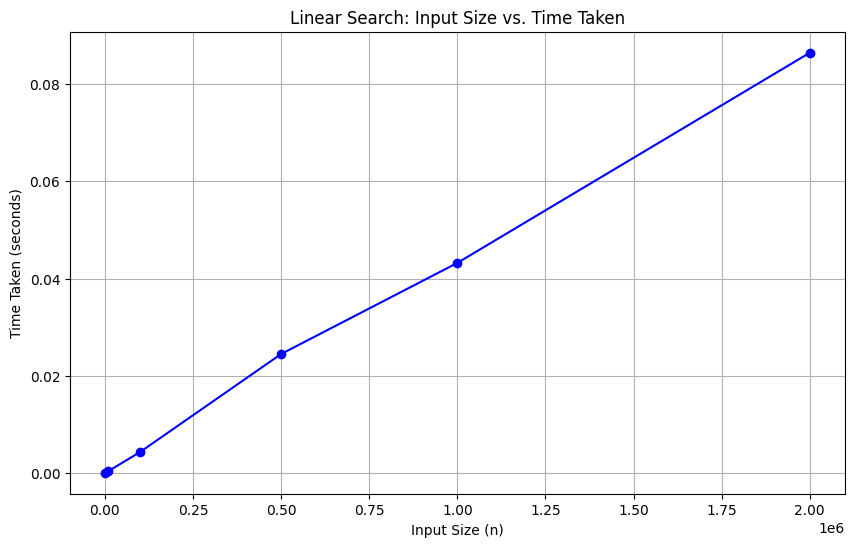

In [3]:
def visualize_performance():
    sizes = [1000, 10000, 100000, 500000, 1000000, 2000000]
    times = []

    for size in sizes:
        # Generate a list of 'size' elements
        test_list = list(range(size))
        # Search for an element not in the list to trigger worst-case time
        target = -1

        start_time = time.time()
        linear_search(test_list, target)
        end_time = time.time()

        times.append(end_time - start_time)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, times, marker='o', linestyle='-', color='b')
    plt.title('Linear Search: Input Size vs. Time Taken')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Time Taken (seconds)')
    plt.grid(True)
    plt.show()

# Run the visualization
visualize_performance()

# 2. Searching
Implement recursive Binary Search. Determine the time required to search an element.Repeat the experiment for different values of n, the number of elements in the list to besearched and plot a graph of the time taken versus n.
- implement recursive Binary Search, measure its time complexity for searching an element and plot a graph of time taken versus different values of n, the number of elements in the list.  
Algorithm:
1. Start with the middle element of the list
2. If the middle element matches the element being searched, return the index of the middle element
3. If the middle element is greater than the element being searched, recursively call the function on the left half of the list
4. If the middle element  is  less than the element  being searched, recursively call the function on the right half of the list
5. If the element is not found, return -1

In [4]:
#Prob_2: write code for recursive Binary Search and plot a graph to visualize the relationship between time taken and input size

In [5]:
import time
import matplotlib.pyplot as plt

def binary_search_recursive(arr, low, high, target):
    # Base case: target is not present
    if high >= low:
        mid = (high + low) // 2

        # If element is present at the middle
        if arr[mid] == target:
            return mid
        # If element is smaller than mid, search left subarray
        elif arr[mid] > target:
            return binary_search_recursive(arr, low, mid - 1, target)
        # Else search right subarray
        else:
            return binary_search_recursive(arr, mid + 1, high, target)
    else:
        return -1

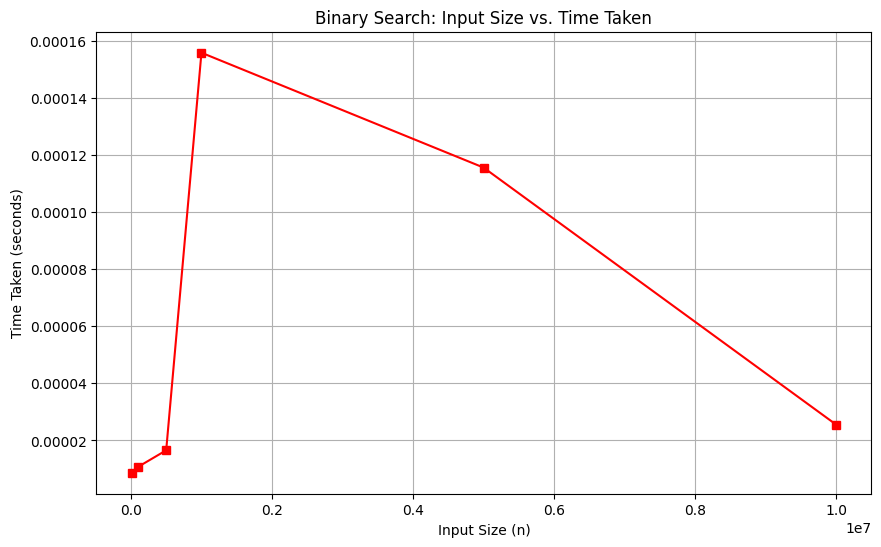

In [6]:
def visualize_binary_performance():
    # We use much larger sizes because binary search is incredibly fast
    sizes = [10000, 100000, 500000, 1000000, 5000000, 10000000]
    times = []

    for size in sizes:
        test_list = list(range(size))  # List must be sorted
        target = -1  # Worst case: element not found

        start_time = time.perf_counter() # Higher precision than time.time()
        binary_search_recursive(test_list, 0, len(test_list) - 1, target)
        end_time = time.perf_counter()

        times.append(end_time - start_time)

    plt.figure(figsize=(10, 6))
    plt.plot(sizes, times, marker='s', linestyle='-', color='r')
    plt.title('Binary Search: Input Size vs. Time Taken')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Time Taken (seconds)')
    plt.grid(True)
    plt.show()

visualize_binary_performance()

#Prob-3
Given a text txt [0...n-1] and a pattern pat [0...m-1], write a function search (char pat [ ],char txt [ ]) that prints all occurrences of pat [ ] in txt [ ]. You may assume that n > m.
- Aim:  To write a function "search" that takes a pattern and a text as input, and outputs all occurrences of the pattern in the text.  Algorithm:
1. Initialize an empty list to store the indices where the pattern occurs in the text.
2. Loop through each character in the text. For each character, check if the substring starting at that character matches the pattern.
3. If there is a match, append the starting index of the substring to the list of occurrences.
4. Continue looping through the text until all possible substrings have been checked.
5. Return the list of indices where the pattern occurs in the text.  




In [7]:
#write code for Prob-3

In [8]:
def search(pat, txt):
    """
    Prints all occurrences of pat[] in txt[]
    """
    n = len(txt)
    m = len(pat)
    indices = []

    # Loop through the text (up to the point where the pattern can still fit)
    for i in range(n - m + 1):
        # Check if the substring matches the pattern
        # This slice represents txt[i...i+m-1]
        if txt[i : i + m] == pat:
            indices.append(i)
            print(f"Pattern found at index {i}")

    return indices

# Example usage:
text_input = "AABAACAADAABAABA"
pattern_input = "AABA"
print(f"Searching for '{pattern_input}' in '{text_input}'...")
results = search(pattern_input, text_input)

Searching for 'AABA' in 'AABAACAADAABAABA'...
Pattern found at index 0
Pattern found at index 9
Pattern found at index 12


In [9]:
import time
import matplotlib.pyplot as plt

def visualize_search_performance():
    text_sizes = [1000, 5000, 10000, 50000, 100000]
    pattern = "TEST"
    times = []

    for size in text_sizes:
        # Create a text string of 'size' characters
        text = "A" * size + "TEST"

        start = time.perf_counter()
        search_silent(pattern, text) # Version of search that doesn't print
        end = time.perf_counter()

        times.append(end - start)

    plt.plot(text_sizes, times, marker='o', color='green')
    plt.title('Naive Pattern Search: Text Size vs. Time')
    plt.xlabel('Text Length (n)')
    plt.ylabel('Time (seconds)')
    plt.grid(True)
    plt.show()

def search_silent(pat, txt):
    n, m = len(txt), len(pat)
    return [i for i in range(n - m + 1) if txt[i : i + m] == pat]

# Uncomment to run the graph:
# visualize_search_performance()

#Prob-4
Sort a given set of elements using the Insertion sort and determine the time required tosort the elements. Repeat the experiment for different values of n, the number of elements in the list to be sorted and plot a graph of the time taken versus n.  
- Aim :  To Develop a program to implement Insertion sort and determine the time required to sort the elements.  
- Algorithm:  
1. Iterate over the array from the second element to the end (i = 1 to n-1).
2. For each element, compare it to the elements before it (j = i-1 to 0).
3. If the current element is smaller, swap it with the element before it.
4. Repeat step 3 until the current element is no longer smaller than the previous element.
5. Repeat steps 2-4 for all elements in the array.

In [10]:
#Prob_4: write code for insertion sort and plot a graph to visualize the relationship between time taken and input size

In [11]:
import time
import random
import matplotlib.pyplot as plt

def insertion_sort(arr):
    # Step 1: Iterate from the second element (index 1) to the end
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1

        # Step 2 & 3: Compare and move elements that are greater than key
        # to one position ahead of their current position
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1

        # Step 4: Insert the element at its correct position
        arr[j + 1] = key
    return arr

Finished n=500 in 0.0075 seconds
Finished n=1000 in 0.0234 seconds
Finished n=2000 in 0.0993 seconds
Finished n=3000 in 0.2155 seconds
Finished n=4000 in 0.4019 seconds
Finished n=5000 in 0.6199 seconds


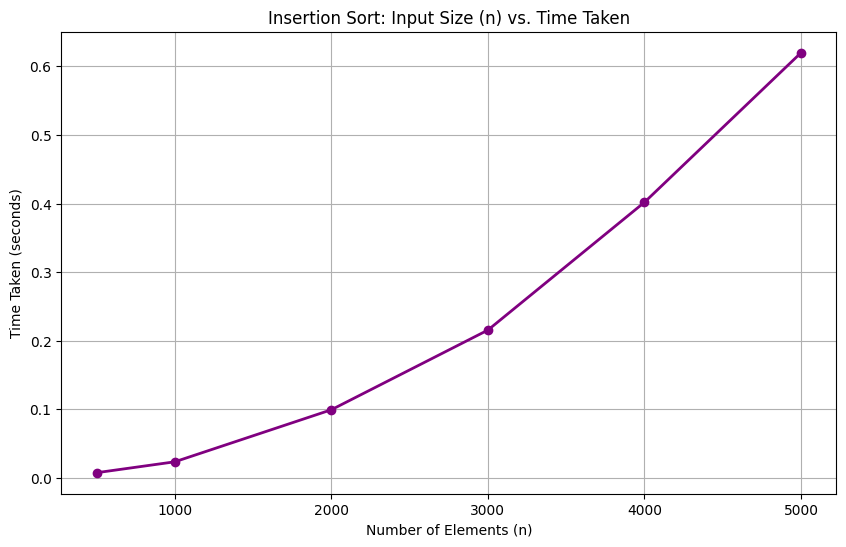

In [12]:
def benchmark_insertion_sort():
    # We use smaller sizes than binary search because O(n^2) grows quickly
    sizes = [500, 1000, 2000, 3000, 4000, 5000]
    times = []

    for n in sizes:
        # Generate a random list of size n
        test_list = [random.randint(0, 10000) for _ in range(n)]

        start_time = time.perf_counter()
        insertion_sort(test_list)
        end_time = time.perf_counter()

        times.append(end_time - start_time)
        print(f"Finished n={n} in {end_time - start_time:.4f} seconds")

    # Plotting the relationship
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, times, marker='o', color='purple', linewidth=2)
    plt.title('Insertion Sort: Input Size (n) vs. Time Taken')
    plt.xlabel('Number of Elements (n)')
    plt.ylabel('Time Taken (seconds)')
    plt.grid(True)
    plt.show()

# Run the experiment
benchmark_insertion_sort()